# Fourier Transform of rect() and Shifted rect()

In [9]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2
from sympy.abc import A,B,t,f 
from sympy import re, im 

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [10]:
tlim = 3
tt = np.linspace(-tlim, tlim, 1000)
flim = 3
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

## Time shift property
$$
x(t-t_0) \Leftrightarrow   e^{-j 2\pi f t_0}X(f)
$$

## Define Two Functions of Interest

In [11]:
def my_rect(A = -1/2,B = 1/2):
    return Piecewise((0, t <= A),(1, t < B),(0, True))

# rect
f1 = my_rect()
lam_f1 = lambdify(ts, f1, modules=['numpy'])

# shifted rect
f2 = my_rect(0,1)
lam_f2 = lambdify(ts, f2, modules=['numpy'])

So here we have 
$$ f_2(t) = f_1(t-0.5) $$
so we would expect
$$
{\cal F}\{f_2(t)\} = e^{-2\pi j f/2} {\cal F}\{f_1(t)\} = e^{-\pi j f} {\cal F}\{f_1(t)\}
$$

## Plot time ftns

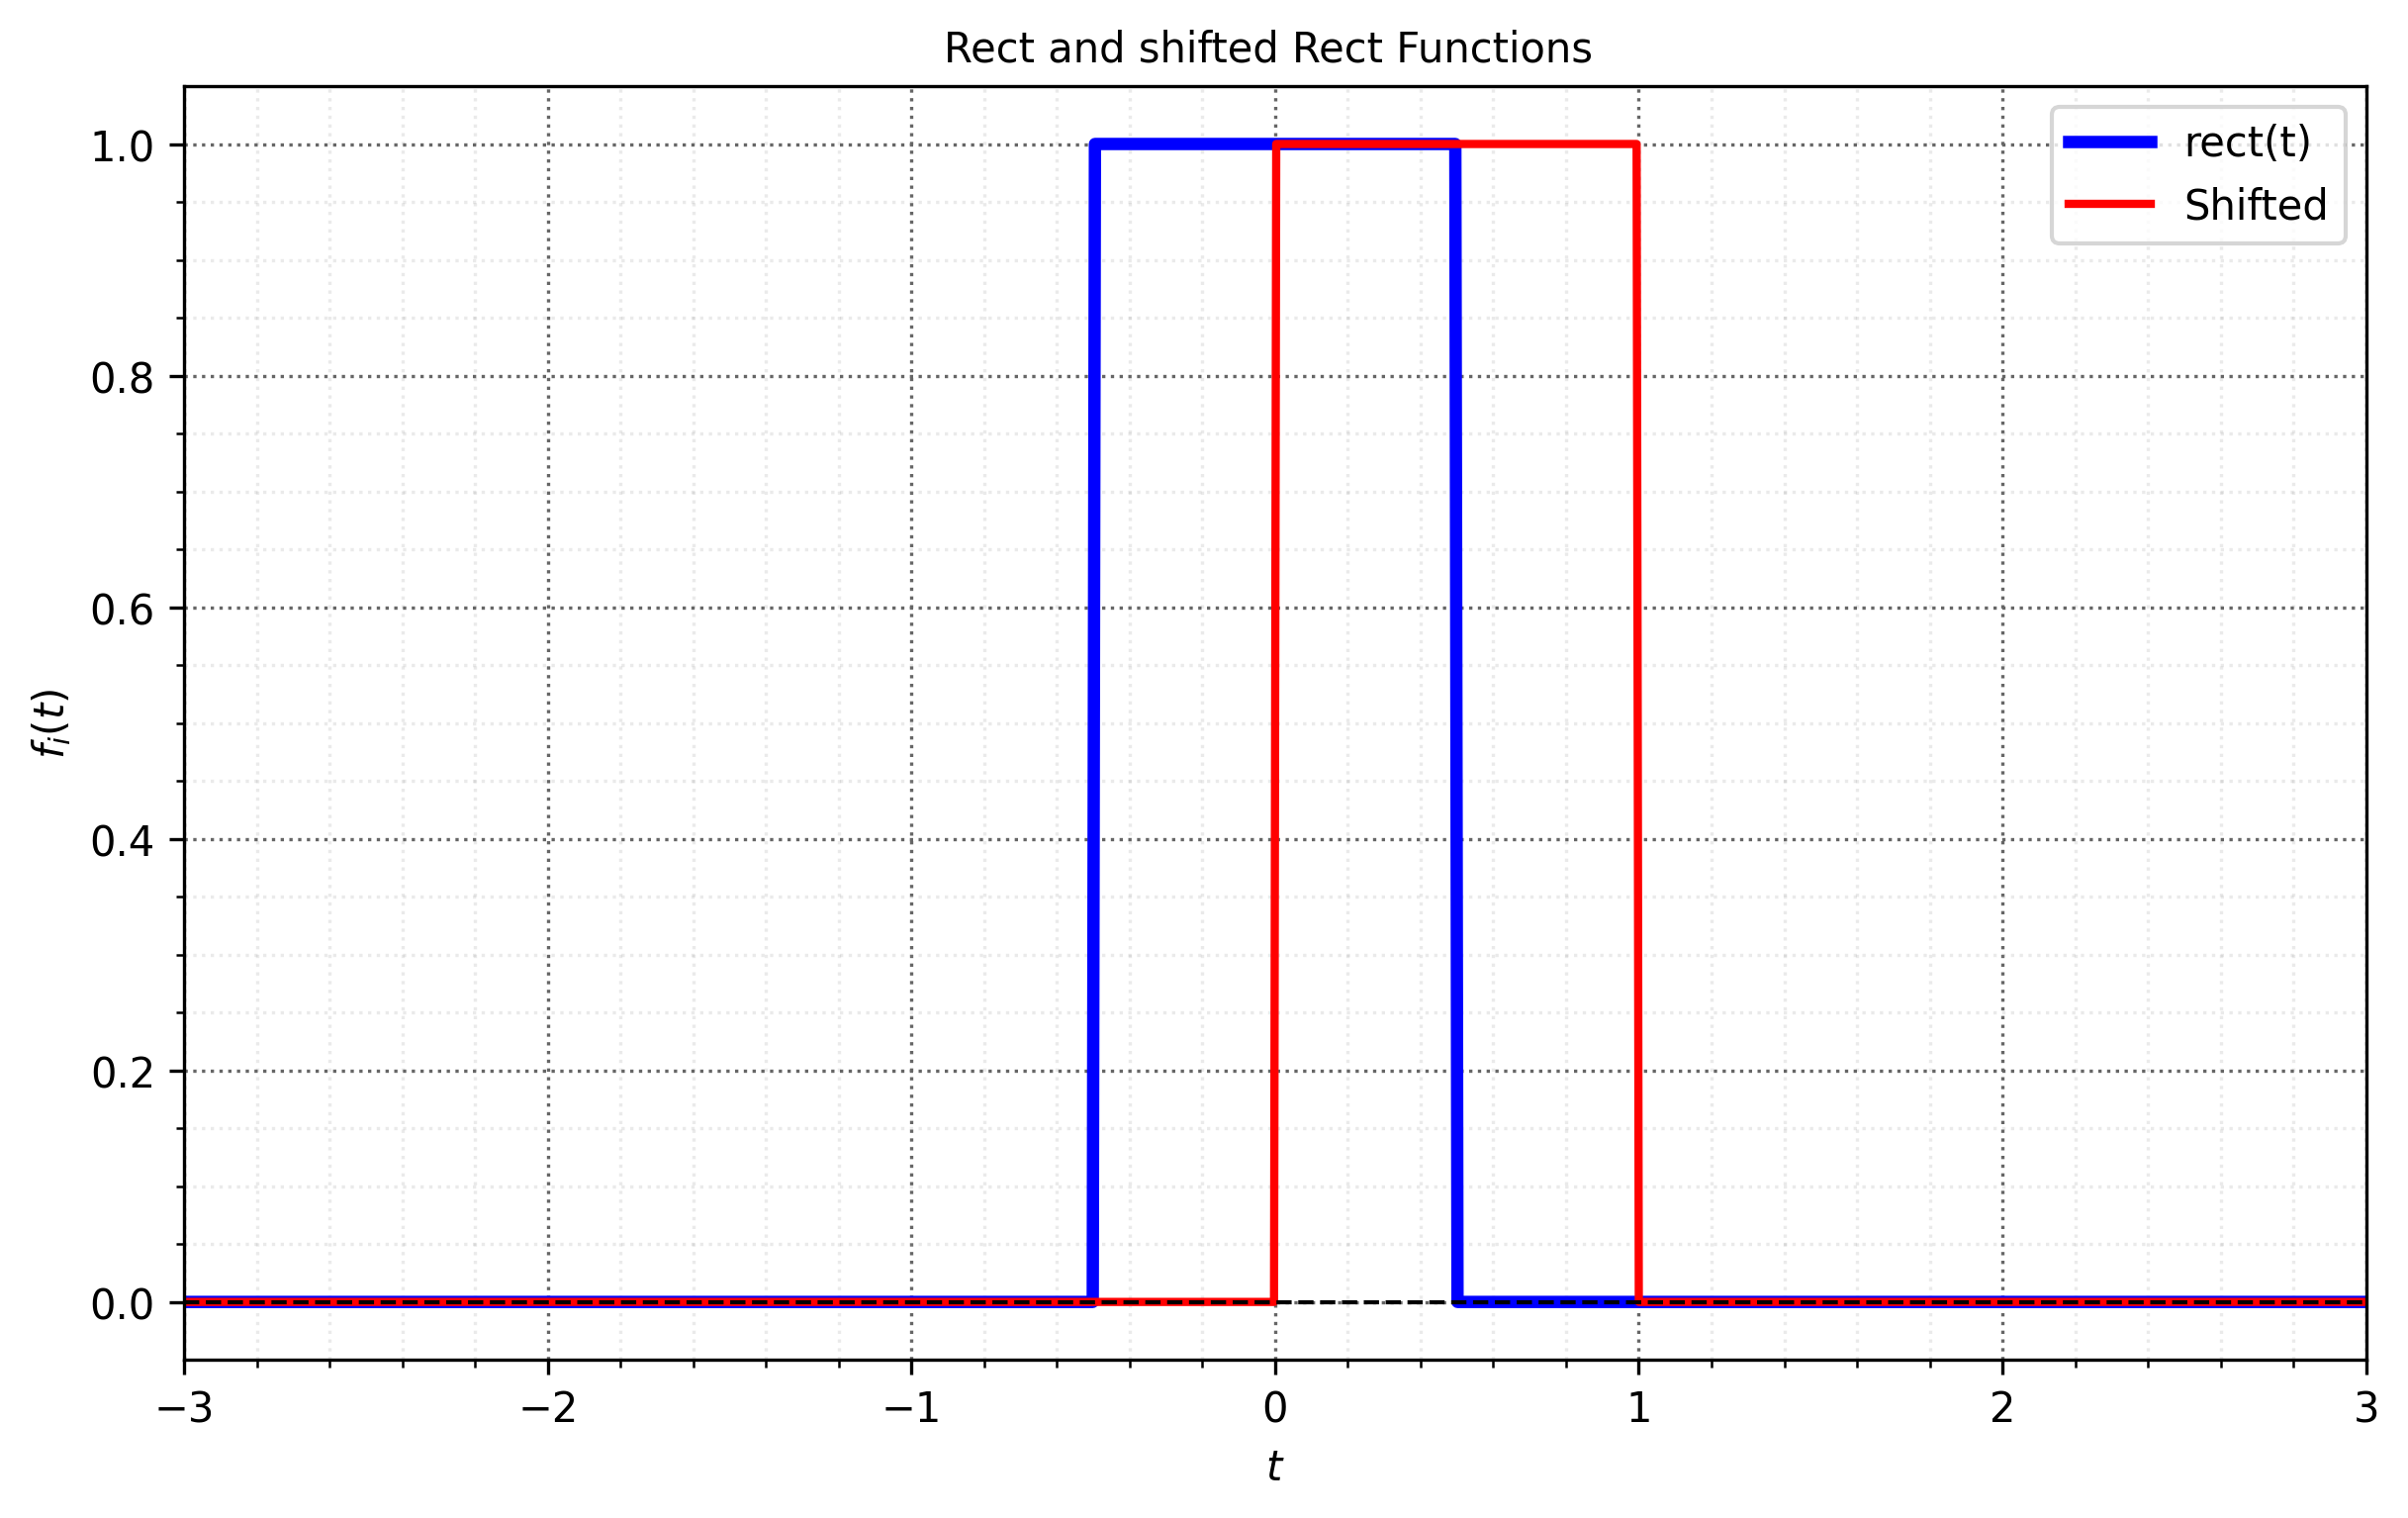

In [12]:
fig = plt.figure(figsize=(8, 5),dpi=300,constrained_layout = True)
plt.plot(tt, lam_f1(tt),'b',label='rect(t)',lw=3)
plt.plot(tt, lam_f2(tt),'r-',label='Shifted')

nicegrid()
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('$f_i(t)$')
plt.title('Rect and shifted Rect Functions ')
fig.savefig('./figs/T7_ex3_1.png', dpi=300)
plt.show()

## Transform and plot Real/Imag Parts

In [13]:
Q1 = fourier_transform(f1, t, f)
lam_Q1i = lambdify(f, im(Q1), modules=['numpy'])
lam_Q1r = lambdify(f, re(Q1), modules=['numpy'])

Q2 = fourier_transform(f2, t, f)
lam_Q2i = lambdify(f, im(Q2), modules=['numpy'])
lam_Q2r = lambdify(f, re(Q2), modules=['numpy'])

## Fourier Transform of original signal

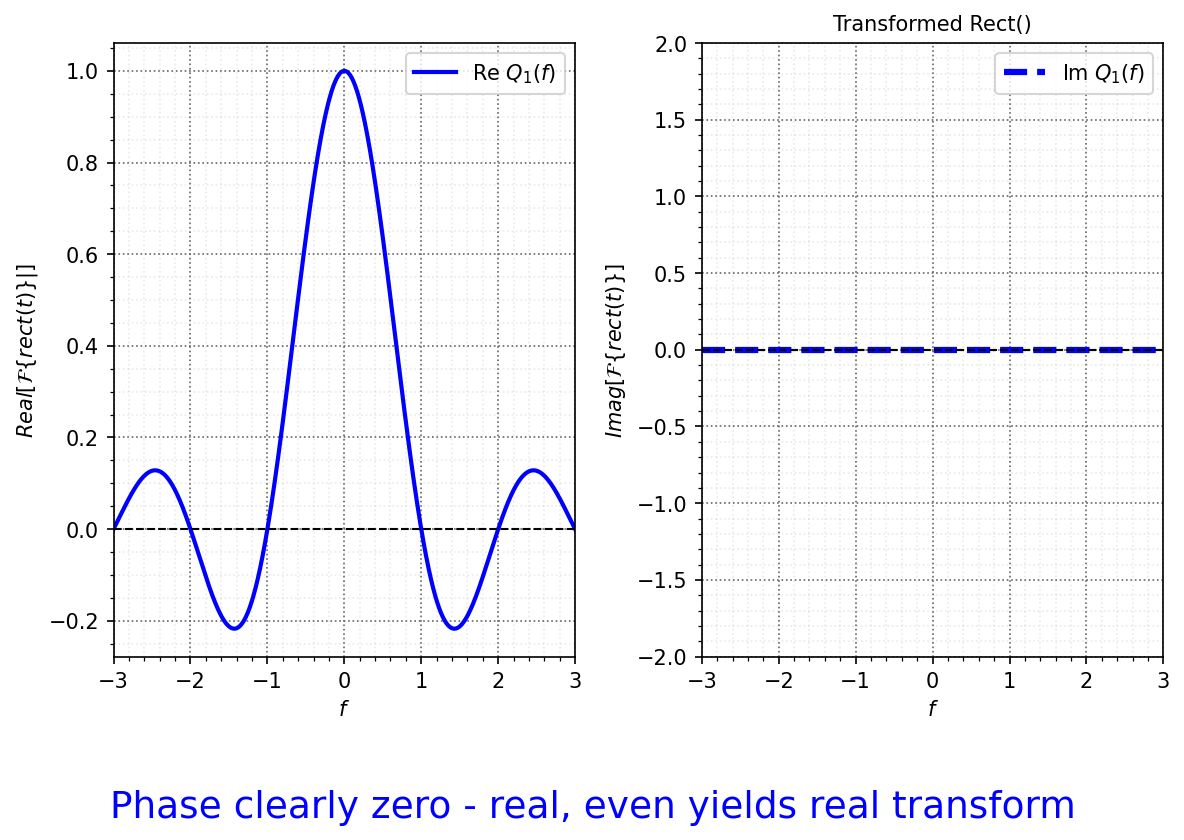

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
fig.tight_layout()
ax1.plot(ff, lam_Q1r(ff),'b',label='Re $Q_1(f)$')
ax1.set_ylabel('$Real[{\cal F}\{ rect(t)\}|]$')
ax1.set_xlabel('$f$')
ax1.set_xlim(-flim,flim)
ax1.legend()
nicegrid(ax1)

ax2.plot(ff, lam_Q1i(ff),'b--',label='Im $Q_1(f)$',lw=3)
ax2.set_title('Phase')
ax2.set_ylabel('$Imag[{\cal F}\{ rect(t)\}]$')
ax2.set_xlabel('$f$')
ax2.set_xlim(-flim,flim)
ax2.set_ylim(-2,2)
nicegrid(ax2)
plt.legend()

plt.title('Transformed Rect()')
nicegrid()
caption('Phase clearly zero - real, even yields real transform',fig)
fig.savefig('./figs/T7_ex3_2.png', dpi=300)
plt.show()

## Now consider shifted signal

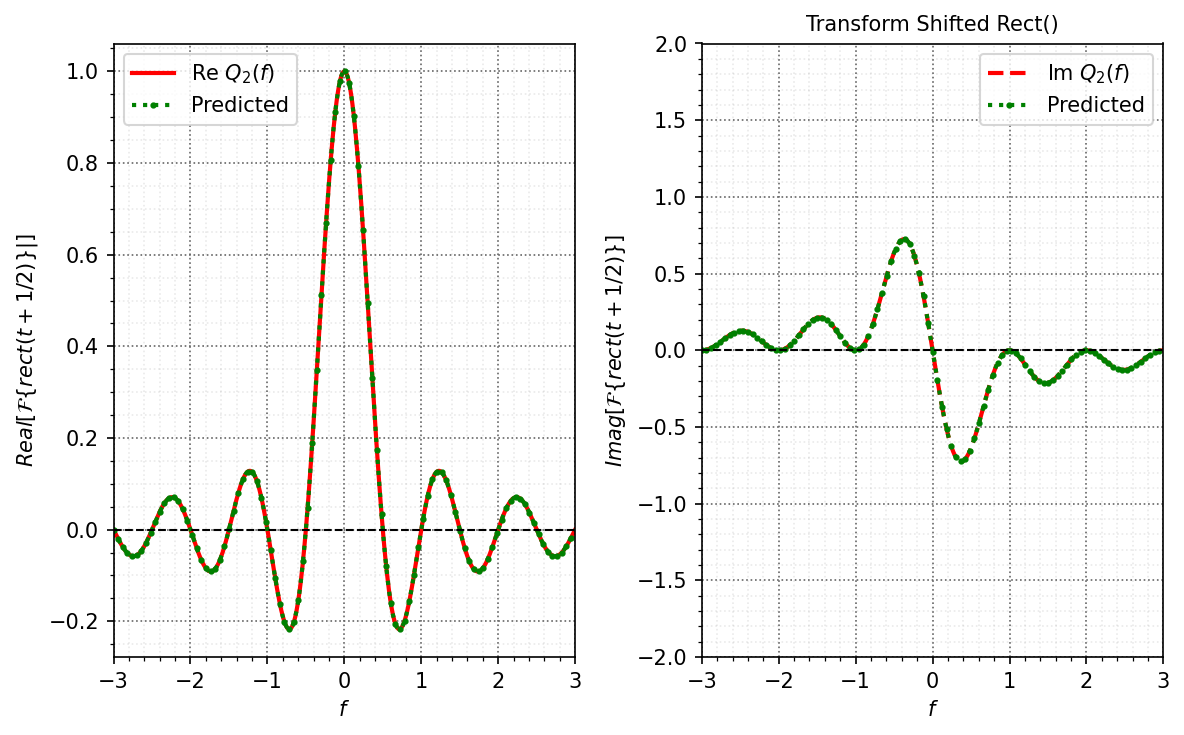

In [15]:
phases = -np.pi*ff

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
fig.tight_layout()
ax1.plot(ff, lam_Q2r(ff),'r',label='Re $Q_2(f)$')
ax1.plot(ff, lam_Q1r(ff)*np.cos(phases) - lam_Q1i(ff)*np.sin(phases) ,'go:',label='Predicted',markevery=10,ms=2)
ax1.set_ylabel('$Real[{\cal F}\{ rect(t+1/2)\}|]$')
ax1.set_xlabel('$f$')
ax1.set_xlim(-flim,flim)
ax1.legend(loc=2)
nicegrid(ax1)

ax2.plot(ff, lam_Q2i(ff),'r--',label='Im $Q_2(f)$')
ax2.plot(ff, lam_Q1r(ff)*np.sin(phases) + lam_Q1i(ff)*np.cos(phases) ,'go:',label='Predicted',markevery=10,ms=2)
ax2.set_ylabel('$Imag[{\cal F}\{ rect(t+1/2)\}]$')
ax2.set_xlabel('$f$')
ax2.set_xlim(-flim,flim)
ax2.set_ylim(-2,2)
nicegrid(ax2)
plt.legend()
plt.title('Transform Shifted Rect()')
fig.savefig('./figs/T7_ex3_3.png', dpi=300)
plt.show()